In [1]:
import numpy as np
import gensim
import os
import re
from ast import literal_eval

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd
import tqdm

In [7]:
df = pd.read_csv('./data/imbd_keywords.csv')
print(df.shape)
df.head()

(40436, 3)


,review,sentiment,keywords
0,One of the other reviewers has mentioned that ...,positive,"['other shows', 'graphic violence', 'prison ex..."
1,A wonderful little production. The filming tec...,positive,"['halliwell', 'michael sheen', 'realism', 'com..."
2,I thought this was a wonderful way to spend ti...,positive,"['spirited young woman', 'devil wears prada', ..."
3,Basically there's a family where a little boy ...,negative,"['playing parents', 'jake', 'parents', 'descen..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"['mr. mattei', 'good luck', 'mattei', 'human r..."


In [8]:
df['keywords'] = df['keywords'].apply(literal_eval)
df.head()

,review,sentiment,keywords
0,One of the other reviewers has mentioned that ...,positive,"[other shows, graphic violence, prison experie..."
1,A wonderful little production. The filming tec...,positive,"[halliwell, michael sheen, realism, comedy, wi..."
2,I thought this was a wonderful way to spend ti...,positive,"[spirited young woman, devil wears prada, summ..."
3,Basically there's a family where a little boy ...,negative,"[playing parents, jake, parents, descent dialo..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[mr. mattei, good luck, mattei, human relation..."


In [9]:
stop_words = [
    'movie',
    'review',
    'film', 
    'actor',
    'actress',
    'films',
]

import spacy
nlp = spacy.load('en_core_web_lg')

In [10]:
stops = nlp.Defaults.stop_words.union(stop_words)

In [11]:
df['keywords'][2]

['spirited young woman',
 'devil wears prada',
 'summer weekend',
 'match point',
 'scarlet johanson',
 'woody allen',
 'devil',
 'proof',
 'woody',
 'woodys comedies',
 'a great comedy',
 'prada',
 'superman',
 'the air conditioned theater',
 'time',
 'control',
 'friends',
 'a light-hearted comedy',
 'likable (even the well bread suspected serial killer',
 'the crown jewel',
 'a wonderful way',
 'a too hot summer weekend',
 'years',
 'the style',
 'the characters',
 'the plot',
 'her "sexy" image',
 'his career',
 'the dialogue',
 'a average',
 'i']

In [12]:
def remove_stops(_list_):
    
    keywords = []
    
    for keyword in _list_:
        
        phrase = []
        
        words = keyword.split()
        
        for word in words:
            if word in stops:
                pass
            else: 
                phrase.append(word)
            
        phrase = ' '.join(phrase)
        
        if len(phrase) > 0:
            keywords.append(phrase)
    
    return keywords

In [13]:
from tqdm import tqdm

tqdm.pandas()

df['clean_keywords'] = df['keywords'].progress_apply(remove_stops)

C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████████████████████████████████████████████████████████████████████████████████████| 40436/40436 [00:01<00:00, 23599.41it/s]


In [14]:
df['clean_keywords'][765]

['orca whales',
 'nolan',
 'clear nolan',
 'total psychos',
 'total psychos',
 'poor poor whale',
 'whale',
 'killer whale',
 'whale',
 'final journey',
 'melvilles eerie man-whale connection',
 'unborn child',
 'ineffectual method',
 'compassion',
 'earth',
 'whales pain',
 'whale-character',
 'whale-hugger',
 'humans',
 'half-thought anti-human message',
 'way',
 'animals',
 'evil men',
 'revenge',
 'melville',
 'growth',
 'half',
 'hideous self-inflicted wounds',
 'message',
 'people',
 'canonical villain',
 'final scene',
 'pregnant cow',
 'unborn fetus',
 'bits',
 'message',
 'squeal',
 'sick psycho-bitch',
 'bizarre journey',
 'good snap',
 'no-doubt',
 'goal',
 'word',
 'respect',
 'mate',
 'talks',
 'grief',
 'motives',
 'focus',
 'wife',
 'cow',
 'truly interesting conclusion',
 'piece',
 'ice',
 'moment',
 'propellers',
 'fin',
 'bad thing',
 'oversight',
 'senses',
 'ends',
 'sea-monster',
 'north',
 'head',
 'victim',
 'mind',
 'water',
 'heart',
 'loss',
 'fisherman',
 'hu

In [16]:
import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
# Dict representation of all our keywords
id2word = corpora.Dictionary(df['clean_keywords'])

In [17]:
id2word.token2id['sea-monster']

18960

In [18]:
len(id2word.keys())

491029

In [19]:
id2word.filter_extremes(no_below=15, no_above=0.85)

In [20]:
len(id2word.keys())

10064

In [21]:
corpus = [id2word.doc2bow(text) for text in df['clean_keywords']]

In [22]:
corpus[812]

[(65, 1),
 (489, 1),
 (565, 1),
 (681, 1),
 (976, 1),
 (1709, 1),
 (2783, 1),
 (3686, 1),
 (3898, 1)]

In [23]:
id2word[77]

'shots'

In [24]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics=20,
                   passes=50, 
                   workers=12
                  )

In [25]:
lda.print_topics()

[(0,
  '0.010*"oscar" + 0.008*"story" + 0.008*"character" + 0.007*"role" + 0.007*"way" + 0.006*"cast" + 0.006*"life" + 0.006*"batman" + 0.006*"fact" + 0.006*"screen"'),
 (1,
  '0.014*"characters" + 0.012*"end" + 0.011*"plot" + 0.011*"story" + 0.010*"time" + 0.010*"actors" + 0.009*"lot" + 0.009*"people" + 0.008*"way" + 0.008*"comedy"'),
 (2,
  '0.013*"time" + 0.009*"people" + 0.009*"cast" + 0.008*"money" + 0.007*"scenes" + 0.007*"hollywood" + 0.007*"world" + 0.007*"way" + 0.006*"director" + 0.006*"script"'),
 (3,
  '0.012*"story" + 0.011*"role" + 0.010*"time" + 0.010*"actors" + 0.009*"dvd" + 0.008*"people" + 0.008*"plot" + 0.006*"way" + 0.006*"performance" + 0.006*"character"'),
 (4,
  '0.011*"plot" + 0.010*"story" + 0.007*"time" + 0.006*"world" + 0.006*"father" + 0.006*"end" + 0.005*"title" + 0.005*"son" + 0.005*"life" + 0.005*"man"'),
 (5,
  '0.010*"time" + 0.009*"night" + 0.009*"girl" + 0.008*"end" + 0.008*"sex" + 0.008*"women" + 0.007*"husband" + 0.007*"wife" + 0.006*"plot" + 0.006*

In [26]:
import re

words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(20)]

In [27]:
topic_labels = [', '.join(t[0:5]) for t in words]

In [28]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

NameError: name 'topics' is not defined

In [29]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [30]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.102453  0.035238       1        1  9.485269
8      0.156557 -0.043671       2        1  8.274468
15    -0.125506  0.049130       3        1  7.877658
9     -0.095091 -0.080206       4        1  7.534900
18     0.061303 -0.170704       5        1  6.046207
10    -0.030218 -0.062151       6        1  5.450714
11    -0.165471  0.059904       7        1  5.229348
1     -0.054743  0.035920       8        1  5.105768
13     0.098476  0.152722       9        1  4.239000
19     0.200782  0.068646      10        1  4.233889
12     0.033565 -0.008845      11        1  4.189555
5      0.013001 -0.125982      12        1  4.185828
17    -0.017230  0.079880      13        1  3.813906
3     -0.052996  0.033424      14        1  3.710851
14    -0.147602 -0.008739      15        1  3.697708
6     -0.000338  0.012014      16        1  3.639953
16     0.025212  0.078456      17        1  3.515681
0      0.005657  0.031483      18        1  3.478630
2     -0.041724  0.004240      19        1  3.402657
4      0.033913 -0.140759      20        1  2.888011, topic_info=            Term         Freq        Total Category  logprob  loglift
8        episode  1034.000000  1034.000000  Default  30.0000  30.0000
1115        gore  1124.000000  1124.000000  Default  29.0000  29.0000
114         kids  1497.000000  1497.000000  Default  28.0000  28.0000
643       series  1794.000000  1794.000000  Default  27.0000  27.0000
173       horror  1374.000000  1374.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
55    characters   105.557687  5504.862189  Topic20  -5.4984  -0.4095
392         mind    87.971614  1643.530274  Topic20  -5.6807   0.6170
82        action    85.327174  1897.383933  Topic20  -5.7112   0.4429
9           fact    87.188259  4420.309561  Topic20  -5.6896  -0.3813
90         money    83.256691  2577.810712  Topic20  -5.7357   0.1118

[1669 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
121       7  0.803978       10 lines
121      14  0.160796       10 lines
121      17  0.017866       10 lines
3552     10  0.014133            30s
3552     11  0.890390            30s
...     ...       ...            ...
80        4  0.909996         zombie
80       15  0.080889         zombie
4355      4  0.952789  zombie movies
2886      4  0.921712        zombies
2886     15  0.074033        zombies

[6406 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 16, 10, 19, 11, 12, 2, 14, 20, 13, 6, 18, 4, 15, 7, 17, 1, 3, 5])

In [31]:
distro = [lda[doc] for doc in corpus]

C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
distro[0]

C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(7, 0.21076396),
 (8, 0.26930135),
 (13, 0.054984916),
 (16, 0.20824425),
 (17, 0.13431157),
 (19, 0.1029271)]

In [33]:
def update(doc):
    d_dist = {k:0 for k in range(0,20)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(doc) for doc in distro] 

C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
topics = pd.DataFrame.from_records(new_distro)
topics.columns = topic_labels

C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
topic_labels

C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['"oscar", "story", "character", "role", "way"',
 '"characters", "end", "plot", "story", "time"',
 '"time", "people", "cast", "money", "scenes"',
 '"story", "role", "time", "actors", "dvd"',
 '"plot", "story", "time", "world", "father"',
 '"time", "night", "girl", "end", "sex"',
 '"story", "indian", "way", "point", "end"',
 '"story", "people", "time", "way", "characters"',
 '"life", "love", "people", "story", "family"',
 '"horror", "gore", "people", "blood", "plot"',
 '"kids", "time", "people", "children", "disney"',
 '"time", "people", "movies", "money", "acting"',
 '"music", "time", "plot", "people", "things"',
 '"american", "english", "people", "story", "french"',
 '"people", "characters", "worst", "time", "movies"',
 '"acting", "time", "story", "plot", "characters"',
 '"story", "start", "characters", "shakespeare", "role"',
 '"series", "episode", "episodes", "season", "sci-fi"',
 '"time", "scene", "story", "police", "end"',
 '"war", "time", "german", "american", "story"']

In [46]:
print(topics.shape)
topics.head()

(40436, 20)


C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"""oscar"", ""story"", ""character"", ""role"", ""way""","""characters"", ""end"", ""plot"", ""story"", ""time""","""time"", ""people"", ""cast"", ""money"", ""scenes""","""story"", ""role"", ""time"", ""actors"", ""dvd""","""plot"", ""story"", ""time"", ""world"", ""father""","""time"", ""night"", ""girl"", ""end"", ""sex""","""story"", ""indian"", ""way"", ""point"", ""end""","""story"", ""people"", ""time"", ""way"", ""characters""","""life"", ""love"", ""people"", ""story"", ""family""","""horror"", ""gore"", ""people"", ""blood"", ""plot""","""kids"", ""time"", ""people"", ""children"", ""disney""","""time"", ""people"", ""movies"", ""money"", ""acting""","""music"", ""time"", ""plot"", ""people"", ""things""","""american"", ""english"", ""people"", ""story"", ""french""","""people"", ""characters"", ""worst"", ""time"", ""movies""","""acting"", ""time"", ""story"", ""plot"", ""characters""","""story"", ""start"", ""characters"", ""shakespeare"", ""role""","""series"", ""episode"", ""episodes"", ""season"", ""sci-fi""","""time"", ""scene"", ""story"", ""police"", ""end""","""war"", ""time"", ""german"", ""american"", ""story"""
0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.210764,0.269301,0.000000,0.000000,0.000000,0.0,0.054985,0.0,0.0,0.208244,0.134312,0.00000,0.102927
1,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.390964,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.368002,0.19627,0.000000
2,0.210731,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.736315,0.000000,0.00000,0.000000
3,0.000000,0.28077,0.0,0.0,0.124204,0.0,0.0,0.000000,0.000000,0.355964,0.177485,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000
4,0.207879,0.00000,0.0,0.0,0.000000,0.0,0.0,0.500234,0.112335,0.000000,0.000000,0.152864,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000


In [49]:
df.shape

C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(40436, 5)

In [47]:
df['primary_topic'] = topics.idxmax(axis=1)

C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
df.head()

C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,sentiment,keywords,clean_keywords,primary_topic
0,One of the other reviewers has mentioned that ...,positive,"[other shows, graphic violence, prison experie...","[shows, graphic violence, prison experience, p...","""life"", ""love"", ""people"", ""story"", ""family"""
1,A wonderful little production. The filming tec...,positive,"[halliwell, michael sheen, realism, comedy, wi...","[halliwell, michael sheen, realism, comedy, wi...","""story"", ""people"", ""time"", ""way"", ""characters"""
2,I thought this was a wonderful way to spend ti...,positive,"[spirited young woman, devil wears prada, summ...","[spirited young woman, devil wears prada, summ...","""story"", ""start"", ""characters"", ""shakespeare"",..."
3,Basically there's a family where a little boy ...,negative,"[playing parents, jake, parents, descent dialo...","[playing parents, jake, parents, descent dialo...","""horror"", ""gore"", ""people"", ""blood"", ""plot"""
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[mr. mattei, good luck, mattei, human relation...","[mr. mattei, good luck, mattei, human relation...","""story"", ""people"", ""time"", ""way"", ""characters"""


In [38]:
df['primary_topic'].value_counts()

C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"acting", "time", "story", "plot", "characters"          4163
"story", "people", "time", "way", "characters"           3598
"horror", "gore", "people", "blood", "plot"              3356
"life", "love", "people", "story", "family"              3136
"time", "people", "movies", "money", "acting"            2757
"kids", "time", "people", "children", "disney"           2608
"characters", "end", "plot", "story", "time"             2545
"time", "scene", "story", "police", "end"                2010
"time", "night", "girl", "end", "sex"                    1592
"people", "characters", "worst", "time", "movies"        1569
"american", "english", "people", "story", "french"       1520
"story", "role", "time", "actors", "dvd"                 1456
"music", "time", "plot", "people", "things"              1419
"story", "indian", "way", "point", "end"                 1375
"series", "episode", "episodes", "season", "sci-fi"      1371
"war", "time", "german", "american", "story"             1336
"story",

In [39]:
agg = pd.pivot_table(df, values=['review'], 
                     index=['primary_topic'], 
                     columns=['sentiment'], aggfunc='count')

C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
agg = agg.reset_index()

C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
agg.columns = ['primary_topic', 'negative', 'positive']
print(agg.shape)
agg.head()

(20, 3)


C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,primary_topic,negative,positive
0,"""acting"", ""time"", ""story"", ""plot"", ""characters""",3123,1040
1,"""american"", ""english"", ""people"", ""story"", ""fre...",663,857
2,"""characters"", ""end"", ""plot"", ""story"", ""time""",1084,1461
3,"""horror"", ""gore"", ""people"", ""blood"", ""plot""",2425,931
4,"""kids"", ""time"", ""people"", ""children"", ""disney""",812,1796


C:\Users\johnt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


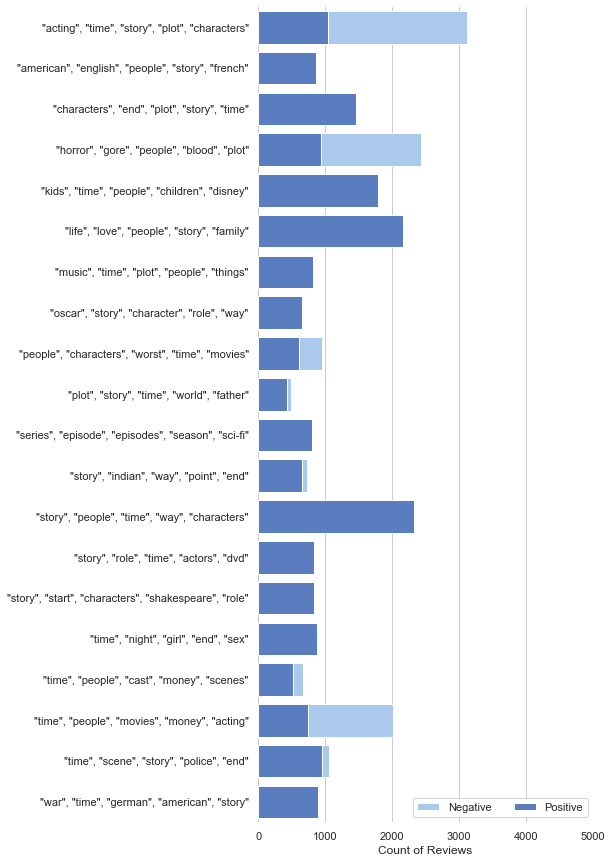

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes('pastel')
sns.barplot(x='negative', y='primary_topic', data=agg, label="Negative", color="b")

sns.set_color_codes('muted')
sns.barplot(x='positive', y='primary_topic', data=agg, label="Positive", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,5000), ylabel="", xlabel="Count of Reviews")
sns.despine(left=True, bottom=True)